<small><i>June 2019 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

In [1]:
#pip install tensorflow-macos
#pip install tensorflow-metal

In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python Platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.14.0

Python 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
Pandas 2.1.3
Scikit-Learn 1.3.0
GPU is NOT AVAILABLE
Num GPUs Available:  0


# pill 13b. A story of deep learning

### 13b.1 Remember when...

This is not a new technique. We are talking of good old *neural networks* with very minor changes.

Remember what a neural network is:

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. 

<img src = 'files/neuron.jpg' width = 400px>

And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

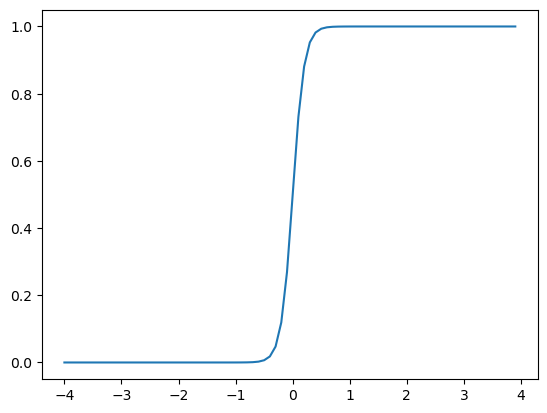

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

x = np.arange(-4,4,0.1)
sig = tf.nn.sigmoid(10*x)

plt.plot(x,sig.numpy())

### 13b.2 Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = 'files/NN.jpg' width = 500px>

The definition of a deep model requires the same steps as described before. They are:

- Define the architecture
- Define the loss function
- Define the optimization algorithm



## Fully connected architectures

In [4]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = data.target

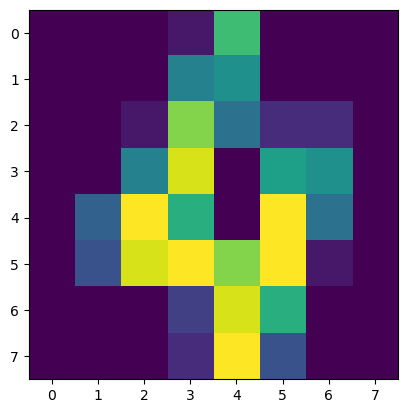

In [5]:
X_train[0,:]
import matplotlib.pyplot as plt

plt.imshow(X_train[4,:].reshape(8,8))

In [6]:
X_train.shape

(1797, 64)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=1000, batch_size = 128)

Epoch 1/1000
15/15 [==============================] - 1s 6ms/step - loss: 11.4763 - accuracy: 0.1018
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1859 - accuracy: 0.1013
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 8.1646 - accuracy: 0.1013
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1869 - accuracy: 0.1013
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 8.1439 - accuracy: 0.1013
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 8.1651 - accuracy: 0.1013
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 8.1486 - accuracy: 0.1013
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1045 - accuracy: 0.1013
Epoch 9/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.0957 - accuracy: 0.1013
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step - loss: 8.0972 - accuracy: 0.101

15/15 [==============================] - 0s 5ms/step - loss: 3.7257 - accuracy: 0.1074
Epoch 83/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.7313 - accuracy: 0.1074
Epoch 84/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.7167 - accuracy: 0.1091
Epoch 85/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.6774 - accuracy: 0.1091
Epoch 86/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.8258 - accuracy: 0.1107
Epoch 87/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.9593 - accuracy: 0.1124
Epoch 88/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.6618 - accuracy: 0.1068
Epoch 89/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.6933 - accuracy: 0.1074
Epoch 90/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.8310 - accuracy: 0.1085
Epoch 91/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.6574 - accuracy: 0.1080
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 3.3170 - accuracy: 0.1124
Epoch 163/1000
15/15 [==============================] - 0s 3ms/step - loss: 3.3259 - accuracy: 0.1146
Epoch 164/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.4295 - accuracy: 0.1191
Epoch 165/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.4980 - accuracy: 0.1191
Epoch 166/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.3075 - accuracy: 0.1141
Epoch 167/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.4983 - accuracy: 0.1107
Epoch 168/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3777 - accuracy: 0.1141
Epoch 169/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3432 - accuracy: 0.1141
Epoch 170/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3435 - accuracy: 0.1163
Epoch 171/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3654 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 3.0613 - accuracy: 0.1191
Epoch 243/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.0344 - accuracy: 0.1208
Epoch 244/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0615 - accuracy: 0.1235
Epoch 245/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.1971 - accuracy: 0.1219
Epoch 246/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.0283 - accuracy: 0.1196
Epoch 247/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0192 - accuracy: 0.1213
Epoch 248/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0178 - accuracy: 0.1196
Epoch 249/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0079 - accuracy: 0.1230
Epoch 250/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0315 - accuracy: 0.1196
Epoch 251/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0179 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 2.5774 - accuracy: 0.1336
Epoch 323/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.5363 - accuracy: 0.1358
Epoch 324/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.5263 - accuracy: 0.1336
Epoch 325/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.4843 - accuracy: 0.1330
Epoch 326/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.4406 - accuracy: 0.1363
Epoch 327/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.4864 - accuracy: 0.1419
Epoch 328/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.9401 - accuracy: 0.1363
Epoch 329/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.5165 - accuracy: 0.1352
Epoch 330/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.4754 - accuracy: 0.1352
Epoch 331/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.4359 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.8533 - accuracy: 0.1469
Epoch 403/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.9541 - accuracy: 0.1486
Epoch 404/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8671 - accuracy: 0.1441
Epoch 405/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.8936 - accuracy: 0.1503
Epoch 406/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8809 - accuracy: 0.1536
Epoch 407/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8874 - accuracy: 0.1514
Epoch 408/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8294 - accuracy: 0.1514
Epoch 409/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8420 - accuracy: 0.1530
Epoch 410/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.9075 - accuracy: 0.1486
Epoch 411/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.8058 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.4938 - accuracy: 0.1608
Epoch 483/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5118 - accuracy: 0.1564
Epoch 484/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4947 - accuracy: 0.1564
Epoch 485/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5947 - accuracy: 0.1592
Epoch 486/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4854 - accuracy: 0.1541
Epoch 487/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4928 - accuracy: 0.1569
Epoch 488/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4752 - accuracy: 0.1558
Epoch 489/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5453 - accuracy: 0.1525
Epoch 490/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.5088 - accuracy: 0.1569
Epoch 491/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4828 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 1.2858 - accuracy: 0.1558
Epoch 563/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2622 - accuracy: 0.1592
Epoch 564/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.2738 - accuracy: 0.1586
Epoch 565/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2861 - accuracy: 0.1592
Epoch 566/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3254 - accuracy: 0.1564
Epoch 567/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2544 - accuracy: 0.1625
Epoch 568/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.2523 - accuracy: 0.1580
Epoch 569/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.3426 - accuracy: 0.1608
Epoch 570/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.2525 - accuracy: 0.1625
Epoch 571/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2779 - accuracy: 0.

15/15 [==============================] - 0s 4ms/step - loss: 1.1177 - accuracy: 0.1558
Epoch 643/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1122 - accuracy: 0.1580
Epoch 644/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.0938 - accuracy: 0.1586
Epoch 645/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1400 - accuracy: 0.1525
Epoch 646/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1224 - accuracy: 0.1508
Epoch 647/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1361 - accuracy: 0.1547
Epoch 648/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1040 - accuracy: 0.1586
Epoch 649/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.0993 - accuracy: 0.1569
Epoch 650/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1118 - accuracy: 0.1564
Epoch 651/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1161 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.9778 - accuracy: 0.1608
Epoch 723/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9871 - accuracy: 0.1608
Epoch 724/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0476 - accuracy: 0.1630
Epoch 725/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9672 - accuracy: 0.1547
Epoch 726/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9782 - accuracy: 0.1586
Epoch 727/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.0096 - accuracy: 0.1614
Epoch 728/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.9928 - accuracy: 0.1647
Epoch 729/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9644 - accuracy: 0.1630
Epoch 730/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9753 - accuracy: 0.1580
Epoch 731/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9600 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.8935 - accuracy: 0.1575
Epoch 803/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8933 - accuracy: 0.1614
Epoch 804/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.8957 - accuracy: 0.1592
Epoch 805/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9417 - accuracy: 0.1575
Epoch 806/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8704 - accuracy: 0.1603
Epoch 807/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.9289 - accuracy: 0.1547
Epoch 808/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9343 - accuracy: 0.1530
Epoch 809/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9129 - accuracy: 0.1553
Epoch 810/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8748 - accuracy: 0.1630
Epoch 811/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8752 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.7927 - accuracy: 0.1586
Epoch 883/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8300 - accuracy: 0.1536
Epoch 884/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9980 - accuracy: 0.1475
Epoch 885/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8027 - accuracy: 0.1675
Epoch 886/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8050 - accuracy: 0.1569
Epoch 887/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8347 - accuracy: 0.1575
Epoch 888/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7837 - accuracy: 0.1586
Epoch 889/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8902 - accuracy: 0.1586
Epoch 890/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7906 - accuracy: 0.1586
Epoch 891/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8619 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.1575
Epoch 963/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7975 - accuracy: 0.1597
Epoch 964/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7436 - accuracy: 0.1619
Epoch 965/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.1614
Epoch 966/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7854 - accuracy: 0.1564
Epoch 967/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7873 - accuracy: 0.1575
Epoch 968/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7424 - accuracy: 0.1597
Epoch 969/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7397 - accuracy: 0.1541
Epoch 970/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.1592
Epoch 971/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9220 - accuracy: 0.

In [9]:
model.evaluate(X_train,  y_train, verbose=2)

57/57 - 1s - loss: 1.7175 - accuracy: 0.1452 - 607ms/epoch - 11ms/step


[1.7175110578536987, 0.14524206519126892]

2/2 [==============================] - 0s 4ms/step


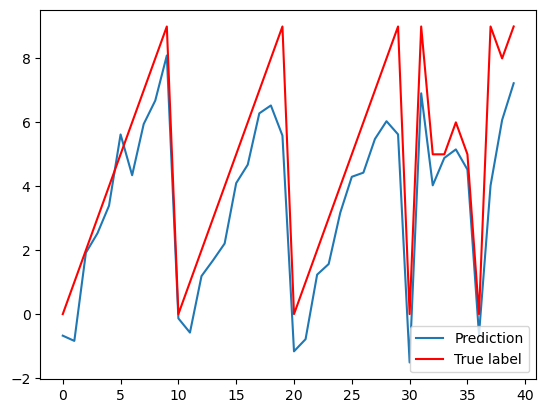

In [10]:
plt.plot(model.predict(X_train[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

**Observations:** It works pretty well, check the following:
- Each layer defines the number of units/neurons. This means that the output of a layer with 100 units is a 100-dimensional vector.
- The "inner" layers use the non-linearity, but the output layer is different! **Why?**
- We introduce or use the concept of **batch** and its corresponding size in the optimization algorithm. Remember that in our current setting we approximate the true loss by a noisy approximation by considering a subset of the data instead of the full dataset at each parameter update.
- We used "mean squared error" but this is useful for regression problems. What about classification as in this case?

**Let us fix some of these issues before moving to nowadays strategies:** For the case of the loss, we can change it to a different representation:

- The output instead of a single integer value can be split using one-hot-encoding. This can be interpreted as drawing a probability for each class. This means that the last layer must comply with the probability axioms. 

The most common technique for that is the use of soft-max layer. A **soft-max** is defined as follows:

$$\sigma(x_i) = \frac{e^x_i}{\sum_j e^{x_j}}$$

This adds up to one for all outputs and the outputs themselves are in the range $[0,1)$.

Then, if the outputs are interpreted as probabilities, it is sensible to use loss functions that optimize probability outputs. One of these is the **cross-entropy** defined as follows:

Given $t_i$ and $y_i$ the target label and the prediction of sample $i$, respectively, the cross-entropy loss is defined as,

$$\mathcal{L}(t_i,y_i) = -\sum_{c=1}^K t_i^c \log{y_i^c}, $$

where $c$ is the super-script indexing the vector component, i.e. the $c$-th component of the vector, and $K$ the number of classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10)
])

#, activation="softmax"
model.compile(optimizer='sgd',
#              loss='categorical_crossentropy',
              loss = 'mean_squared_error',
              metrics=['accuracy'])

But now we have to one-hot encode the outputs...

In [12]:
oh_y_train = tf.one_hot(y_train, 10)

In [13]:
model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 1s 3ms/step - loss: 0.1673 - accuracy: 0.0707
Epoch 2/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.0595
Epoch 3/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.0751
Epoch 4/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.0801
Epoch 5/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 0.0751
Epoch 6/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.0868
Epoch 7/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.0651
Epoch 8/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.0740
Epoch 9/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.0935
Epoch 10/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.0735
Epoch 11/

57/57 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.3400
Epoch 84/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.3539
Epoch 85/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.3439
Epoch 86/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.3556
Epoch 87/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.3584
Epoch 88/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.3701
Epoch 89/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.3734
Epoch 90/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.3823
Epoch 91/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.3879
Epoch 92/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.3968
Epoch 93/750


57/57 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.6600
Epoch 165/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.6811
Epoch 166/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.6628
Epoch 167/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.6795
Epoch 168/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.6639
Epoch 169/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.6761
Epoch 170/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.6806
Epoch 171/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.6661
Epoch 172/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.6656
Epoch 173/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.6611
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.7685
Epoch 246/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.7679
Epoch 247/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.7629
Epoch 248/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.7707
Epoch 249/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.7685
Epoch 250/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0753 - accuracy: 0.7585
Epoch 251/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.7691
Epoch 252/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.7757
Epoch 253/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.7702
Epoch 254/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.7702
Epoc

57/57 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.7991
Epoch 327/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.8002
Epoch 328/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.8024
Epoch 329/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.7958
Epoch 330/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.8024
Epoch 331/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.7974
Epoch 332/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.8013
Epoch 333/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.7874
Epoch 334/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.8047
Epoch 335/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.7980
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.8191
Epoch 408/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.8175
Epoch 409/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.8152
Epoch 410/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.8203
Epoch 411/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.8152
Epoch 412/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.8169
Epoch 413/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.8169
Epoch 414/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.8180
Epoch 415/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.8253
Epoch 416/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.8186
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.8403
Epoch 489/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.8381
Epoch 490/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.8342
Epoch 491/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.8370
Epoch 492/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.8375
Epoch 493/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.8319
Epoch 494/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.8370
Epoch 495/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.8325
Epoch 496/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.8258
Epoch 497/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.8331
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.8470
Epoch 570/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.8514
Epoch 571/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.8470
Epoch 572/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.8453
Epoch 573/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.8464
Epoch 574/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 0.8459
Epoch 575/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 0.8470
Epoch 576/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.8475
Epoch 577/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.8464
Epoch 578/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.8470
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.8564
Epoch 651/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.8525
Epoch 652/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.8536
Epoch 653/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.8542
Epoch 654/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.8575
Epoch 655/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.8587
Epoch 656/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.8564
Epoch 657/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.8614
Epoch 658/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.8542
Epoch 659/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.8570
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.8648
Epoch 732/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.8664
Epoch 733/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.8631
Epoch 734/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.8625
Epoch 735/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.8737
Epoch 736/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.8637
Epoch 737/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.8659
Epoch 738/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.8681
Epoch 739/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.8692
Epoch 740/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.8653
Epoc

2/2 [==============================] - 0s 8ms/step


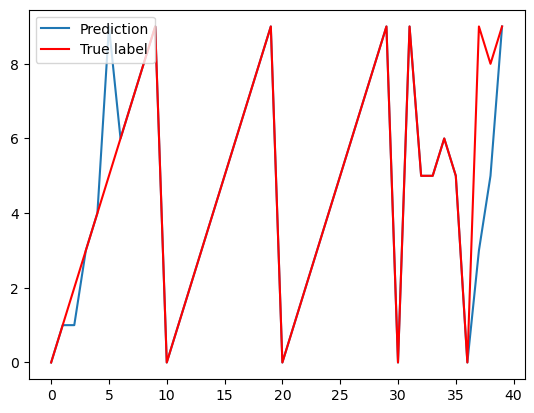

In [14]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [15]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.0521 - accuracy: 0.8720 - 378ms/epoch - 7ms/step


[0.05206204205751419, 0.8720089197158813]

## Deep learning ... deep problems

### PROBLEM 1: Dead neurons and vanishing gradients.

Let us add more layers. We will expect that we may learn even better.

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 1s 4ms/step - loss: 2.3948 - accuracy: 0.1002
Epoch 2/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3306 - accuracy: 0.1002
Epoch 3/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3124 - accuracy: 0.1002
Epoch 4/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3067 - accuracy: 0.0902
Epoch 5/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3050 - accuracy: 0.0907
Epoch 6/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3044 - accuracy: 0.0885
Epoch 7/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3038 - accuracy: 0.1002
Epoch 8/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3037 - accuracy: 0.0991
Epoch 9/750
57/57 [==============================] - 0s 3ms/step - loss: 2.3038 - accuracy: 0.0952
Epoch 10/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3041 - accuracy: 0.0796
Epoch 11/

57/57 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.0935
Epoch 84/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.0979
Epoch 85/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1007
Epoch 86/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3033 - accuracy: 0.1002
Epoch 87/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3033 - accuracy: 0.0974
Epoch 88/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.0991
Epoch 89/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3032 - accuracy: 0.0929
Epoch 90/750
57/57 [==============================] - 0s 3ms/step - loss: 2.3033 - accuracy: 0.0896
Epoch 91/750
57/57 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.0991
Epoch 92/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1013
Epoch 93/750


57/57 [==============================] - 0s 4ms/step - loss: 2.3023 - accuracy: 0.1113
Epoch 165/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3024 - accuracy: 0.1013
Epoch 166/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3024 - accuracy: 0.1007
Epoch 167/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3024 - accuracy: 0.0979
Epoch 168/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3024 - accuracy: 0.1080
Epoch 169/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3024 - accuracy: 0.0940
Epoch 170/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3023 - accuracy: 0.1119
Epoch 171/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3025 - accuracy: 0.1007
Epoch 172/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3022 - accuracy: 0.0940
Epoch 173/750
57/57 [==============================] - 0s 5ms/step - loss: 2.3021 - accuracy: 0.1052
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.3015 - accuracy: 0.1068
Epoch 246/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3014 - accuracy: 0.1002
Epoch 247/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3014 - accuracy: 0.1185
Epoch 248/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3016 - accuracy: 0.1096
Epoch 249/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3015 - accuracy: 0.1085
Epoch 250/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3013 - accuracy: 0.1029
Epoch 251/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3015 - accuracy: 0.1107
Epoch 252/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3012 - accuracy: 0.1102
Epoch 253/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 254/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3016 - accuracy: 0.0991
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.3003 - accuracy: 0.1046
Epoch 327/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3004 - accuracy: 0.1241
Epoch 328/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3004 - accuracy: 0.1029
Epoch 329/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3003 - accuracy: 0.1091
Epoch 330/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3004 - accuracy: 0.1280
Epoch 331/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3001 - accuracy: 0.1124
Epoch 332/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3001 - accuracy: 0.1185
Epoch 333/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3000 - accuracy: 0.1258
Epoch 334/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3001 - accuracy: 0.1241
Epoch 335/750
57/57 [==============================] - 0s 4ms/step - loss: 2.3001 - accuracy: 0.1063
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1180
Epoch 408/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1391
Epoch 409/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1458
Epoch 410/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2982 - accuracy: 0.1091
Epoch 411/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1074
Epoch 412/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2984 - accuracy: 0.1152
Epoch 413/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1336
Epoch 414/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1274
Epoch 415/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2982 - accuracy: 0.1263
Epoch 416/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2982 - accuracy: 0.1319
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.2951 - accuracy: 0.1714
Epoch 489/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.1469
Epoch 490/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2952 - accuracy: 0.1619
Epoch 491/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.1575
Epoch 492/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.1497
Epoch 493/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.1614
Epoch 494/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2949 - accuracy: 0.1363
Epoch 495/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2948 - accuracy: 0.1547
Epoch 496/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2947 - accuracy: 0.1630
Epoch 497/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2945 - accuracy: 0.1731
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.2882 - accuracy: 0.1859
Epoch 570/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2883 - accuracy: 0.1519
Epoch 571/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2881 - accuracy: 0.1319
Epoch 572/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2880 - accuracy: 0.1931
Epoch 573/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2880 - accuracy: 0.2120
Epoch 574/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2878 - accuracy: 0.1758
Epoch 575/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2876 - accuracy: 0.1597
Epoch 576/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2873 - accuracy: 0.2304
Epoch 577/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2874 - accuracy: 0.2165
Epoch 578/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2871 - accuracy: 0.2738
Epoc

57/57 [==============================] - 0s 5ms/step - loss: 2.2675 - accuracy: 0.3155
Epoch 651/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2670 - accuracy: 0.3189
Epoch 652/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2664 - accuracy: 0.3144
Epoch 653/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2659 - accuracy: 0.3283
Epoch 654/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2655 - accuracy: 0.3211
Epoch 655/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2648 - accuracy: 0.3556
Epoch 656/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2642 - accuracy: 0.3606
Epoch 657/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2639 - accuracy: 0.3066
Epoch 658/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2631 - accuracy: 0.3044
Epoch 659/750
57/57 [==============================] - 0s 5ms/step - loss: 2.2625 - accuracy: 0.3244
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 2.1067 - accuracy: 0.3239
Epoch 732/750
57/57 [==============================] - 0s 4ms/step - loss: 2.1011 - accuracy: 0.3361
Epoch 733/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0955 - accuracy: 0.3573
Epoch 734/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0897 - accuracy: 0.3172
Epoch 735/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0837 - accuracy: 0.3133
Epoch 736/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0776 - accuracy: 0.2794
Epoch 737/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0712 - accuracy: 0.2966
Epoch 738/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0649 - accuracy: 0.3361
Epoch 739/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0588 - accuracy: 0.3172
Epoch 740/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0522 - accuracy: 0.3428
Epoc

2/2 [==============================] - 0s 4ms/step


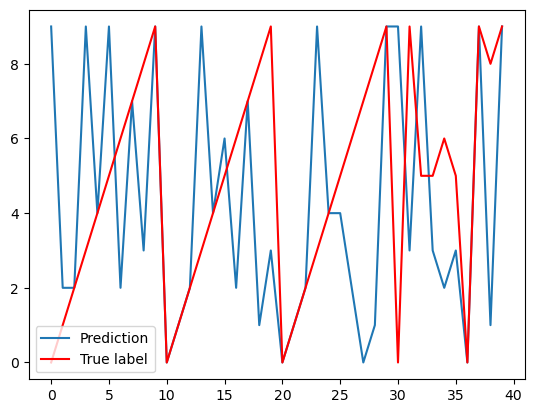

In [17]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [18]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 1.9787 - accuracy: 0.3812 - 464ms/epoch - 8ms/step


[1.978747010231018, 0.38119086623191833]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b>What is wrong??????</div>



The problem lays in the neuron model and its working regime. This gives rise to the problem of  of **vanishing gradients** and **dead neurons** when learning the network. A simple way of solving this problem is to let the neuron model output to grow indefinitely on one side. The simplest model is the **Rectified Linear Unit**, i.e.

$$relu(x) = \max(0,x)$$



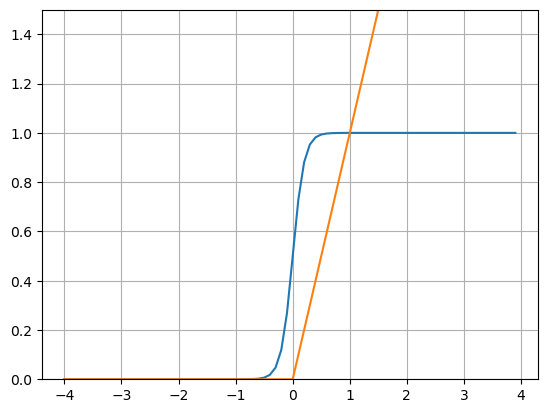

In [19]:
x = np.arange(-4,4,0.1)
rel = tf.nn.relu(x)

plt.plot(x,sig.numpy())
plt.plot(x,rel.numpy()) 
ax = plt.gca()
ax.set_ylim(0,1.5)
plt.grid('on')

Let us replace the activation with **ReLU**.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 1s 4ms/step - loss: 2.2870 - accuracy: 0.1330
Epoch 2/750
57/57 [==============================] - 0s 4ms/step - loss: 2.2408 - accuracy: 0.1775
Epoch 3/750
57/57 [==============================] - 0s 4ms/step - loss: 2.1908 - accuracy: 0.2387
Epoch 4/750
57/57 [==============================] - 0s 3ms/step - loss: 2.1259 - accuracy: 0.3467
Epoch 5/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0376 - accuracy: 0.4424
Epoch 6/750
57/57 [==============================] - 0s 4ms/step - loss: 1.9227 - accuracy: 0.4864
Epoch 7/750
57/57 [==============================] - 0s 4ms/step - loss: 1.7816 - accuracy: 0.5437
Epoch 8/750
57/57 [==============================] - 0s 3ms/step - loss: 1.6199 - accuracy: 0.5854
Epoch 9/750
57/57 [==============================] - 0s 4ms/step - loss: 1.4540 - accuracy: 0.6416
Epoch 10/750
57/57 [==============================] - 0s 3ms/step - loss: 1.2951 - accuracy: 0.6733
Epoch 11/

57/57 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9900
Epoch 84/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9900
Epoch 85/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9883
Epoch 86/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9911
Epoch 87/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9911
Epoch 88/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9900
Epoch 89/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9917
Epoch 90/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9917
Epoch 91/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9928
Epoch 92/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9894
Epoch 93/750


57/57 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9994
Epoch 165/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9989
Epoch 166/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9989
Epoch 167/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.9989
Epoch 168/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9994
Epoch 169/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9994
Epoch 170/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9994
Epoch 171/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9994
Epoch 172/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 173/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 246/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 247/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 248/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 249/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 250/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 251/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 252/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 253/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 254/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 327/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 328/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 329/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 330/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 331/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 332/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 333/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 334/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 335/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 408/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 409/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 410/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 411/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 412/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 413/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 414/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 415/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 416/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 489/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 490/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 491/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 492/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 493/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 494/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 495/750
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 496/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 497/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 570/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 571/750
57/57 [==============================] - 0s 4ms/step - loss: 9.9570e-04 - accuracy: 1.0000
Epoch 572/750
57/57 [==============================] - 0s 4ms/step - loss: 9.9786e-04 - accuracy: 1.0000
Epoch 573/750
57/57 [==============================] - 0s 4ms/step - loss: 9.9118e-04 - accuracy: 1.0000
Epoch 574/750
57/57 [==============================] - 0s 3ms/step - loss: 9.9286e-04 - accuracy: 1.0000
Epoch 575/750
57/57 [==============================] - 0s 2ms/step - loss: 9.9368e-04 - accuracy: 1.0000
Epoch 576/750
57/57 [==============================] - 0s 4ms/step - loss: 9.8923e-04 - accuracy: 1.0000
Epoch 577/750
57/57 [==============================] - 0s 4ms/step - loss: 9.7973e-04 - accuracy: 1.0000
Epoch 578/750
57/57 [==============================] - 0s 3ms/step - loss: 9.

57/57 [==============================] - 0s 4ms/step - loss: 8.1693e-04 - accuracy: 1.0000
Epoch 648/750
57/57 [==============================] - 0s 4ms/step - loss: 8.1123e-04 - accuracy: 1.0000
Epoch 649/750
57/57 [==============================] - 0s 4ms/step - loss: 8.1175e-04 - accuracy: 1.0000
Epoch 650/750
57/57 [==============================] - 0s 4ms/step - loss: 8.0688e-04 - accuracy: 1.0000
Epoch 651/750
57/57 [==============================] - 0s 5ms/step - loss: 8.0529e-04 - accuracy: 1.0000
Epoch 652/750
57/57 [==============================] - 0s 5ms/step - loss: 7.9785e-04 - accuracy: 1.0000
Epoch 653/750
57/57 [==============================] - 0s 4ms/step - loss: 8.0459e-04 - accuracy: 1.0000
Epoch 654/750
57/57 [==============================] - 0s 4ms/step - loss: 7.9926e-04 - accuracy: 1.0000
Epoch 655/750
57/57 [==============================] - 0s 5ms/step - loss: 8.0308e-04 - accuracy: 1.0000
Epoch 656/750
57/57 [==============================] - 0s 5ms/step - 

57/57 [==============================] - 0s 4ms/step - loss: 6.8385e-04 - accuracy: 1.0000
Epoch 726/750
57/57 [==============================] - 0s 4ms/step - loss: 6.7665e-04 - accuracy: 1.0000
Epoch 727/750
57/57 [==============================] - 0s 4ms/step - loss: 6.7817e-04 - accuracy: 1.0000
Epoch 728/750
57/57 [==============================] - 0s 5ms/step - loss: 6.7608e-04 - accuracy: 1.0000
Epoch 729/750
57/57 [==============================] - 0s 4ms/step - loss: 6.8077e-04 - accuracy: 1.0000
Epoch 730/750
57/57 [==============================] - 0s 4ms/step - loss: 6.7573e-04 - accuracy: 1.0000
Epoch 731/750
57/57 [==============================] - 0s 5ms/step - loss: 6.6759e-04 - accuracy: 1.0000
Epoch 732/750
57/57 [==============================] - 0s 4ms/step - loss: 6.6863e-04 - accuracy: 1.0000
Epoch 733/750
57/57 [==============================] - 0s 4ms/step - loss: 6.7029e-04 - accuracy: 1.0000
Epoch 734/750
57/57 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 6ms/step


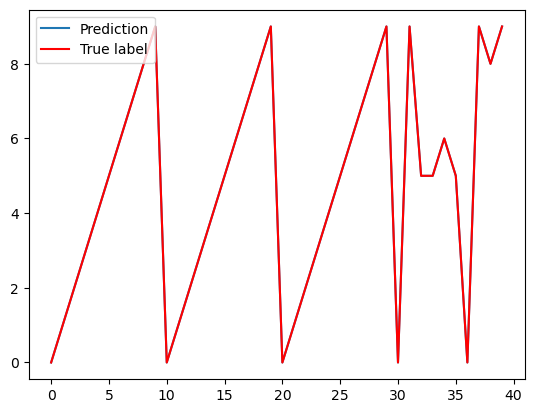

In [21]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [22]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 6.3190e-04 - accuracy: 1.0000 - 479ms/epoch - 8ms/step


[0.0006319023086689413, 1.0]



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

There are different non-linear activations that can be used to address the challenges of dead neurons and vanishing gradients, such as ReLU, SeLU, Leaky ReLU, etc. These units are important because they allow the signal to flow forward and the gradient to flow backwards.

</div>



### PROBLEM 2: Internal covariate shift

and we are very HAPPY and try even more deep models!!!!!

In [23]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])



model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)


Epoch 1/150
57/57 [==============================] - 3s 6ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 2/150
57/57 [==============================] - 0s 6ms/step - loss: 2.3015 - accuracy: 0.1113
Epoch 3/150
57/57 [==============================] - 0s 5ms/step - loss: 2.3014 - accuracy: 0.1503
Epoch 4/150
57/57 [==============================] - 0s 6ms/step - loss: 2.3013 - accuracy: 0.1024
Epoch 5/150
57/57 [==============================] - 0s 6ms/step - loss: 2.3011 - accuracy: 0.1603
Epoch 6/150
57/57 [==============================] - 0s 6ms/step - loss: 2.3010 - accuracy: 0.1336
Epoch 7/150
57/57 [==============================] - 0s 4ms/step - loss: 2.3009 - accuracy: 0.1152
Epoch 8/150
57/57 [==============================] - 0s 5ms/step - loss: 2.3008 - accuracy: 0.1642
Epoch 9/150
57/57 [==============================] - 0s 6ms/step - loss: 2.3006 - accuracy: 0.1658
Epoch 10/150
57/57 [==============================] - 0s 5ms/step - loss: 2.3005 - accuracy: 0.1530
Epoch 11/

57/57 [==============================] - 0s 6ms/step - loss: 2.2788 - accuracy: 0.1758
Epoch 84/150
57/57 [==============================] - 0s 6ms/step - loss: 2.2780 - accuracy: 0.1742
Epoch 85/150
57/57 [==============================] - 0s 7ms/step - loss: 2.2772 - accuracy: 0.1753
Epoch 86/150
57/57 [==============================] - 0s 6ms/step - loss: 2.2764 - accuracy: 0.1747
Epoch 87/150
57/57 [==============================] - 0s 7ms/step - loss: 2.2755 - accuracy: 0.1742
Epoch 88/150
57/57 [==============================] - 0s 6ms/step - loss: 2.2746 - accuracy: 0.1764
Epoch 89/150
57/57 [==============================] - 0s 5ms/step - loss: 2.2737 - accuracy: 0.1764
Epoch 90/150
57/57 [==============================] - 0s 5ms/step - loss: 2.2727 - accuracy: 0.1758
Epoch 91/150
57/57 [==============================] - 0s 5ms/step - loss: 2.2716 - accuracy: 0.1747
Epoch 92/150
57/57 [==============================] - 0s 6ms/step - loss: 2.2705 - accuracy: 0.1753
Epoch 93/150


2/2 [==============================] - 0s 6ms/step


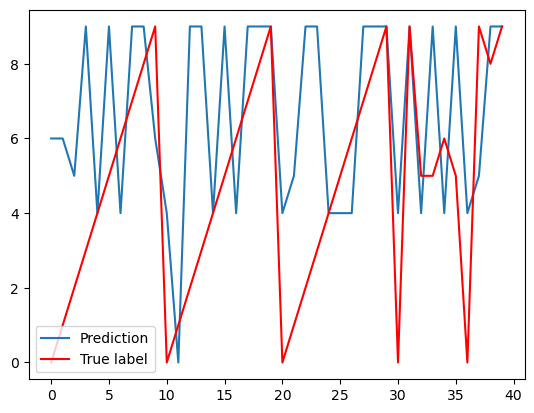

In [24]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [25]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 1s - loss: 2.0001 - accuracy: 0.1914 - 633ms/epoch - 11ms/step


[2.000098943710327, 0.19143016636371613]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b> WHAT?????? WHY???? Didn't we just solved the problem?</div>



In [26]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150
57/57 [==============================] - 9s 12ms/step - loss: 2.4578 - accuracy: 0.1068
Epoch 2/150
57/57 [==============================] - 1s 12ms/step - loss: 2.4175 - accuracy: 0.1157
Epoch 3/150
57/57 [==============================] - 1s 12ms/step - loss: 2.4292 - accuracy: 0.1202
Epoch 4/150
57/57 [==============================] - 1s 12ms/step - loss: 2.4005 - accuracy: 0.1152
Epoch 5/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3717 - accuracy: 0.1213
Epoch 6/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3605 - accuracy: 0.1369
Epoch 7/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3521 - accuracy: 0.1313
Epoch 8/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3674 - accuracy: 0.1180
Epoch 9/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3417 - accuracy: 0.1369
Epoch 10/150
57/57 [==============================] - 1s 12ms/step - loss: 2.3280 - accuracy: 0.1347

57/57 [==============================] - 1s 10ms/step - loss: 1.5542 - accuracy: 0.5058
Epoch 83/150
57/57 [==============================] - 1s 11ms/step - loss: 1.5391 - accuracy: 0.5225
Epoch 84/150
57/57 [==============================] - 1s 10ms/step - loss: 1.5250 - accuracy: 0.5214
Epoch 85/150
57/57 [==============================] - 1s 10ms/step - loss: 1.5160 - accuracy: 0.5214
Epoch 86/150
57/57 [==============================] - 1s 11ms/step - loss: 1.6047 - accuracy: 0.4819
Epoch 87/150
57/57 [==============================] - 1s 11ms/step - loss: 1.5804 - accuracy: 0.5003
Epoch 88/150
57/57 [==============================] - 1s 10ms/step - loss: 1.5819 - accuracy: 0.5003
Epoch 89/150
57/57 [==============================] - 1s 11ms/step - loss: 1.5257 - accuracy: 0.5331
Epoch 90/150
57/57 [==============================] - 1s 11ms/step - loss: 1.5242 - accuracy: 0.5292
Epoch 91/150
57/57 [==============================] - 1s 11ms/step - loss: 1.5135 - accuracy: 0.5259
Epo

2/2 [==============================] - 1s 8ms/step


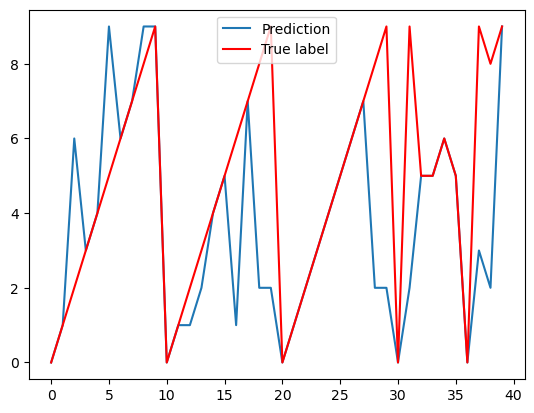

In [27]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [28]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 1s - loss: 1.0838 - accuracy: 0.6984 - 1s/epoch - 19ms/step


[1.0837938785552979, 0.6983861923217773]

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Bat  (None, 40)                160       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 20)                820   

In [30]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_1st_output = K.function(inp,[model.layers[1].output])
layer_output = get_1st_output(X_train)

(array([  4.,   9.,  19.,  43.,  53., 102., 136., 162., 155., 171., 155.,
        164., 125., 108., 111.,  71.,  56.,  44.,  25.,  27.,  14.,  10.,
         14.,  11.,   6.,   0.,   0.,   1.,   0.,   1.]),
 array([2.29875685, 2.52231977, 2.7458827 , 2.96944562, 3.19300855,
        3.41657148, 3.6401344 , 3.86369733, 4.08726025, 4.31082318,
        4.53438611, 4.75794903, 4.98151196, 5.20507488, 5.42863781,
        5.65220074, 5.87576366, 6.09932659, 6.32288951, 6.54645244,
        6.77001537, 6.99357829, 7.21714122, 7.44070414, 7.66426707,
        7.88783   , 8.11139292, 8.33495585, 8.55851877, 8.7820817 ,
        9.00564463]),
 <BarContainer object of 30 artists>)

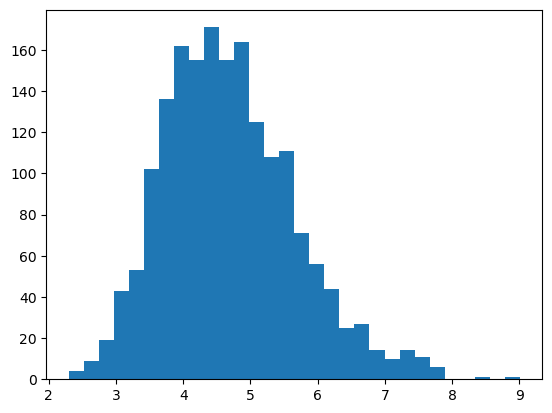

In [31]:
m = np.mean(X_train,axis=0)
plt.hist(np.sum(np.power(X_train-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [32]:
layer_output

[array([[0.        , 0.        , 0.9908249 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.06617671],
        [0.        , 0.        , 0.63750637, ..., 0.        , 0.        ,
         0.2779295 ],
        ...,
        [0.        , 0.        , 0.45274806, ..., 0.        , 0.        ,
         0.27981082],
        [0.        , 0.        , 0.4729621 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.68852353, ..., 0.        , 0.        ,
         0.16231535]], dtype=float32)]

(array([  4.,   9.,  16.,  34.,  45.,  73.,  75.,  83., 107., 122., 146.,
        122., 137., 120., 141., 132., 109.,  87.,  58.,  60.,  36.,  30.,
         16.,  11.,  10.,   5.,   3.,   3.,   1.,   2.]),
 array([ 1.57217121,  1.85735917,  2.14254713,  2.42773509,  2.71292305,
         2.99811101,  3.28329897,  3.56848693,  3.85367465,  4.13886261,
         4.42405081,  4.70923853,  4.99442673,  5.27961445,  5.56480265,
         5.84999037,  6.13517809,  6.42036629,  6.70555401,  6.99074221,
         7.27592993,  7.56111813,  7.84630585,  8.13149357,  8.41668224,
         8.70186996,  8.98705769,  9.27224541,  9.55743408,  9.8426218 ,
        10.12780952]),
 <BarContainer object of 30 artists>)

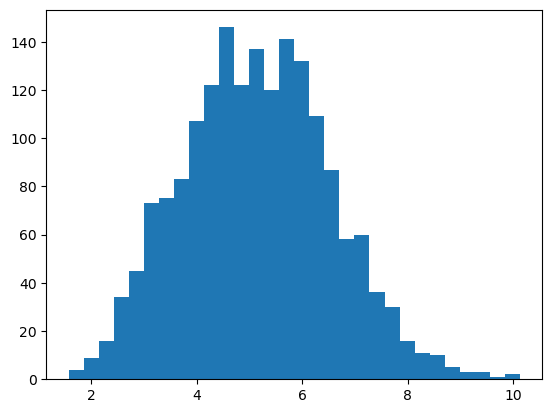

In [33]:
m = np.mean(layer_output[0],axis=0)
plt.hist(np.sum(np.power(layer_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [34]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[2].output])
batch_output = get_batch_output(X_train)

(array([  8.,  20.,  59.,  94., 122., 146., 192., 172., 191., 185., 168.,
        124.,  79.,  66.,  54.,  37.,  24.,  15.,   7.,  11.,   4.,   6.,
          3.,   3.,   2.,   1.,   1.,   2.,   0.,   1.]),
 array([ 19.02415276,  24.36741066,  29.71066666,  35.05392456,
         40.39718246,  45.74044037,  51.08369446,  56.42695236,
         61.77021027,  67.11346436,  72.45672607,  77.79998016,
         83.14324188,  88.48649597,  93.82975006,  99.17301178,
        104.51626587, 109.85952759, 115.20278168, 120.5460434 ,
        125.88929749, 131.2325592 , 136.57580566, 141.91906738,
        147.2623291 , 152.60557556, 157.94883728, 163.292099  ,
        168.63536072, 173.97860718, 179.3218689 ]),
 <BarContainer object of 30 artists>)

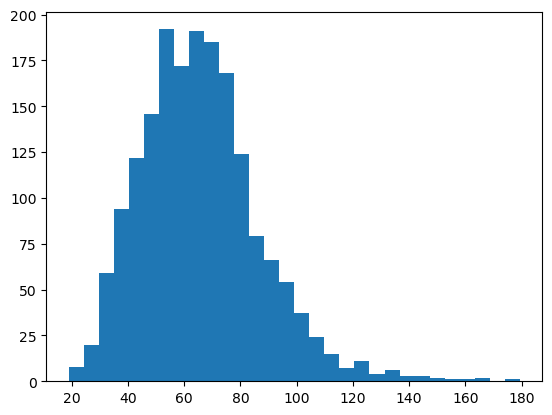

In [35]:
m = np.mean(batch_output[0],axis=0)
plt.hist(np.sum(np.power(batch_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

Sooooo... if we reset statistics can ```sigmoid``` work? **YES!!!!**

Let's check it...

In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="sigmoid")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)
oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150
57/57 [==============================] - 8s 11ms/step - loss: 2.4263 - accuracy: 0.0890
Epoch 2/150
57/57 [==============================] - 1s 11ms/step - loss: 2.3884 - accuracy: 0.1063
Epoch 3/150
57/57 [==============================] - 1s 11ms/step - loss: 2.3573 - accuracy: 0.1213
Epoch 4/150
57/57 [==============================] - 1s 11ms/step - loss: 2.3269 - accuracy: 0.1247
Epoch 5/150
57/57 [==============================] - 1s 11ms/step - loss: 2.3014 - accuracy: 0.1285
Epoch 6/150
57/57 [==============================] - 1s 11ms/step - loss: 2.2829 - accuracy: 0.1302
Epoch 7/150
57/57 [==============================] - 1s 11ms/step - loss: 2.2684 - accuracy: 0.1391
Epoch 8/150
57/57 [==============================] - 1s 11ms/step - loss: 2.2560 - accuracy: 0.1452
Epoch 9/150
57/57 [==============================] - 1s 10ms/step - loss: 2.2414 - accuracy: 0.1575
Epoch 10/150
57/57 [==============================] - 1s 11ms/step - loss: 2.2332 - accuracy: 0.1669

57/57 [==============================] - 1s 11ms/step - loss: 1.8707 - accuracy: 0.5420
Epoch 83/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8656 - accuracy: 0.5409
Epoch 84/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8609 - accuracy: 0.5554
Epoch 85/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8544 - accuracy: 0.5520
Epoch 86/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8576 - accuracy: 0.5492
Epoch 87/150
57/57 [==============================] - 1s 10ms/step - loss: 1.8504 - accuracy: 0.5476
Epoch 88/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8418 - accuracy: 0.5737
Epoch 89/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8404 - accuracy: 0.5587
Epoch 90/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8379 - accuracy: 0.5676
Epoch 91/150
57/57 [==============================] - 1s 11ms/step - loss: 1.8355 - accuracy: 0.5643
Epo

2/2 [==============================] - 1s 9ms/step


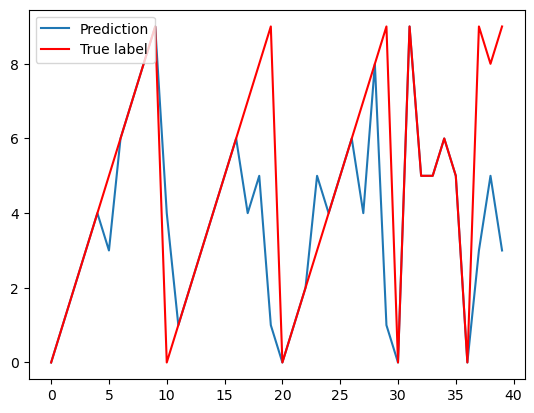

In [37]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [38]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 1s - loss: 1.5462 - accuracy: 0.8102 - 1s/epoch - 19ms/step


[1.5461680889129639, 0.810239315032959]

## Errrrr ... btw, all the process was wrong! Where is training and test????

In [39]:
from sklearn.datasets import load_digits
import numpy as np

from sklearn.model_selection import train_test_split

data=load_digits()
X = data.data/16.
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [40]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150
29/29 [==============================] - 4s 7ms/step - loss: 2.6367 - accuracy: 0.1013
Epoch 2/150
29/29 [==============================] - 0s 7ms/step - loss: 2.5609 - accuracy: 0.0958
Epoch 3/150
29/29 [==============================] - 0s 6ms/step - loss: 2.4219 - accuracy: 0.1392
Epoch 4/150
29/29 [==============================] - 0s 6ms/step - loss: 2.3321 - accuracy: 0.1715
Epoch 5/150
29/29 [==============================] - 0s 6ms/step - loss: 2.2527 - accuracy: 0.2004
Epoch 6/150
29/29 [==============================] - 0s 7ms/step - loss: 2.1396 - accuracy: 0.2550
Epoch 7/150
29/29 [==============================] - 0s 7ms/step - loss: 2.1039 - accuracy: 0.2450
Epoch 8/150
29/29 [==============================] - 0s 6ms/step - loss: 2.0920 - accuracy: 0.2517
Epoch 9/150
29/29 [==============================] - 0s 7ms/step - loss: 1.9989 - accuracy: 0.3029
Epoch 10/150
29/29 [==============================] - 0s 6ms/step - loss: 1.9173 - accuracy: 0.3486
Epoch 11/

29/29 [==============================] - 0s 7ms/step - loss: 0.8398 - accuracy: 0.7728
Epoch 84/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8098 - accuracy: 0.7873
Epoch 85/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8649 - accuracy: 0.7684
Epoch 86/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8457 - accuracy: 0.7661
Epoch 87/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8382 - accuracy: 0.7918
Epoch 88/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8096 - accuracy: 0.7851
Epoch 89/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8478 - accuracy: 0.7751
Epoch 90/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8828 - accuracy: 0.7751
Epoch 91/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8211 - accuracy: 0.7851
Epoch 92/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8615 - accuracy: 0.7829
Epoch 93/150


2/2 [==============================] - 0s 11ms/step


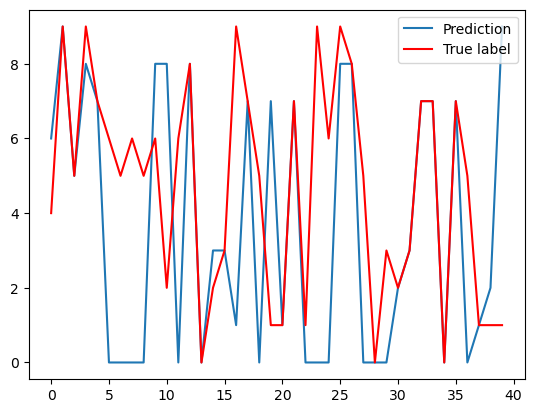

In [41]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

2/2 [==============================] - 0s 9ms/step


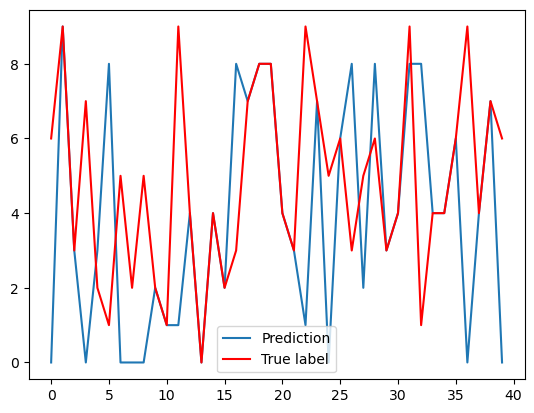

In [42]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [43]:
model.evaluate(X_train,  oh_y_train, verbose=2)

29/29 - 1s - loss: 1.3305 - accuracy: 0.5568 - 599ms/epoch - 21ms/step


[1.3304849863052368, 0.5567928552627563]

In [44]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 1.4990 - accuracy: 0.5373 - 143ms/epoch - 5ms/step


[1.4990066289901733, 0.5372636318206787]

You are making me crazy... now what!!!!!!!!



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

I am sure you know about PAC learning and concentration of measure inequalities and the trade-off between complexity and number of samples. In this case, we have very few samples. How can we synthetically "augment data". Enter the dragon! ... ops... Enter the <b>dropout</b>!

</div>



In [45]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dropout(0.2)(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150
29/29 [==============================] - 4s 7ms/step - loss: 2.7606 - accuracy: 0.1047
Epoch 2/150
29/29 [==============================] - 0s 6ms/step - loss: 2.6688 - accuracy: 0.1158
Epoch 3/150
29/29 [==============================] - 0s 7ms/step - loss: 2.5964 - accuracy: 0.1247
Epoch 4/150
29/29 [==============================] - 0s 7ms/step - loss: 2.4868 - accuracy: 0.1503
Epoch 5/150
29/29 [==============================] - 0s 6ms/step - loss: 2.4303 - accuracy: 0.1559
Epoch 6/150
29/29 [==============================] - 0s 7ms/step - loss: 2.3407 - accuracy: 0.1693
Epoch 7/150
29/29 [==============================] - 0s 6ms/step - loss: 2.3204 - accuracy: 0.1860
Epoch 8/150
29/29 [==============================] - 0s 6ms/step - loss: 2.2320 - accuracy: 0.1993
Epoch 9/150
29/29 [==============================] - 0s 7ms/step - loss: 2.1895 - accuracy: 0.2149
Epoch 10/150
29/29 [==============================] - 0s 7ms/step - loss: 2.1496 - accuracy: 0.2450
Epoch 11/

29/29 [==============================] - 0s 6ms/step - loss: 0.8564 - accuracy: 0.7784
Epoch 84/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8297 - accuracy: 0.7895
Epoch 85/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8277 - accuracy: 0.7984
Epoch 86/150
29/29 [==============================] - 0s 6ms/step - loss: 0.8718 - accuracy: 0.7717
Epoch 87/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8346 - accuracy: 0.7996
Epoch 88/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8369 - accuracy: 0.7929
Epoch 89/150
29/29 [==============================] - 0s 8ms/step - loss: 0.8153 - accuracy: 0.8007
Epoch 90/150
29/29 [==============================] - 0s 7ms/step - loss: 0.8111 - accuracy: 0.7873
Epoch 91/150
29/29 [==============================] - 0s 8ms/step - loss: 0.8475 - accuracy: 0.7795
Epoch 92/150
29/29 [==============================] - 0s 9ms/step - loss: 0.8194 - accuracy: 0.7784
Epoch 93/150


2/2 [==============================] - 0s 8ms/step


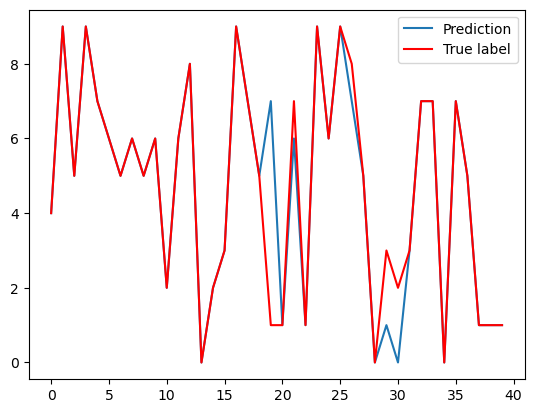

In [46]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [47]:
model.evaluate(X_train,  oh_y_train, verbose=2)

29/29 - 1s - loss: 0.4859 - accuracy: 0.8820 - 596ms/epoch - 21ms/step


[0.48591065406799316, 0.8819599151611328]

2/2 [==============================] - 0s 0s/step


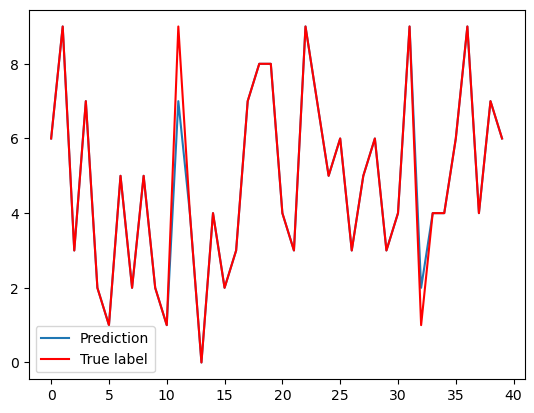

In [48]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [49]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 0.5797 - accuracy: 0.8387 - 139ms/epoch - 5ms/step


[0.5797000527381897, 0.8387096524238586]



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>Oh my ... This is just AWESOME!!!!! We recovered some prediction power!!!!</b>    
</div>



## Interpreting deep learning as feature representations 



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>THE FINAL AND MOST IMPORTANT TAKE HOME IDEA:</b>    
    
Deep learning is all about learning representations. As a classifier it is a fiasco. But then... how does it work so well? Because all layers up to the last one can be interpreted as transformations of the data. And just the last layer is the classification step. For examples in the case of soft-max the decision boundary is linear. This is a really simple classifier, thus if the network is to work well the transformation must be such that a linear classifier is able to perform well enough.

<b>This is really what deep learning is about!</b>
</div>



Let us check this out. We will recover a relative ok classification such as the last model trained, slice the last layer, and replace it with a real classifier... and see what happens.

First, let us access the last layer representation:

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Bat  (None, 40)                160       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 40)                1640  

In [51]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[0].output])
batch_output = get_batch_output(X_train)

In [52]:
batch_output

[array([[0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.    , 0.5625, ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.0625, 0.5   , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]],
       dtype=float32)]

In [53]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(101)
clf.fit(batch_output[0],y_train)

RandomForestClassifier(n_estimators=101)

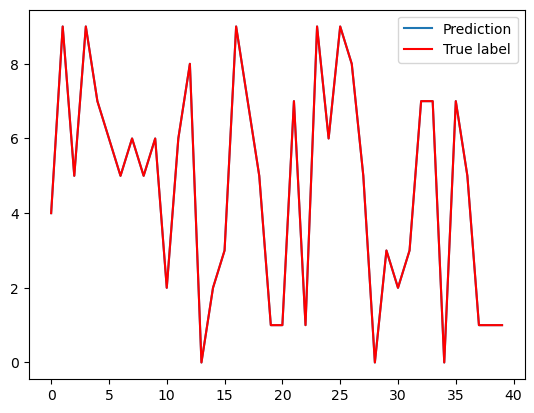

In [54]:
bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [55]:
np.mean(np.where(np.abs(clf.predict(bo)-y_train)<1e-6,1.,0.))

1.0

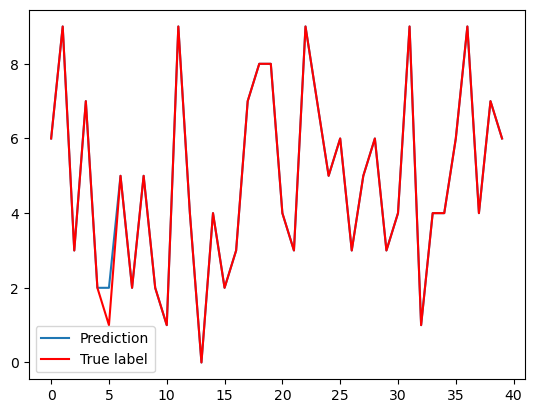

In [56]:
batch_output = get_batch_output(X_test)

bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [57]:
np.mean(np.where(np.abs(clf.predict(bo)-y_test)<1e-6,1.,0.))

0.9599555061179088

# Recap exercise



<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>EXERCISE: </b> It is your turn to code a deep feed forward neural network to solve the problem of classifying fashion images.
    
<b>RULES: </b> Solve the problem with maximum accuracy but with the smallest amount of <b>trainable parameters</b>. To check the amount of parameters use ```model.summary()```.
</div>



In [58]:
#Load data set

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label:9
Number of unique labels: [0 1 2 3 4 5 6 7 8 9]
Data set size: (60000, 28, 28)


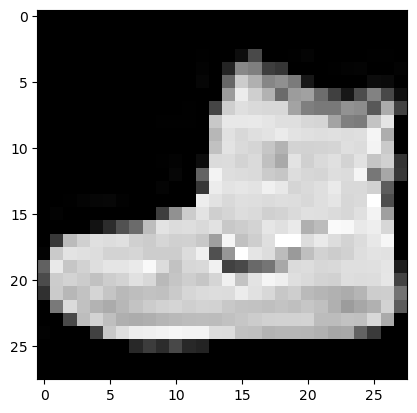

In [59]:
%matplotlib inline

#Check some basic info
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0],cmap='gray')
print('Label:'+str(train_labels[0]))
print('Number of unique labels: '+str(np.unique(train_labels)))
print('Data set size: ' + str(train_images.shape))

In [60]:
#Rasterize data

X_train = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
y_train = train_labels
X_test = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
y_test = test_labels


In [61]:
X_test.shape

(10000, 784)

In [62]:
#Use X_train, y_train, X_test, y_test to code your deep learning code

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flatten the images
X_train = train_images.reshape((train_images.shape[0], -1)).astype('float32') / 255.0
X_test = test_images.reshape((test_images.shape[0], -1)).astype('float32') / 255.0

# Define the model
model = models.Sequential()

# Add a hidden layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add an output layer with 10 units (for 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, test_labels)
print('\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5178 - accuracy: 0.8177 - val_loss: 0.4665 - val_accuracy: 0.8384
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3840 - accuracy: 0.8634 - val_loss: 0.4240 - val_accuracy: 0.8398
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3429 - accuracy: 0.8759 - val_loss: 0.3860 - 

Explanation:

The model consists of a single hidden layer with 128 units and ReLU activation.
The output layer has 10 units with softmax activation for multiclass classification.
The model is compiled with the Adam optimizer and sparse categorical crossentropy loss.
Training is done for 10 epochs with a batch size of 32.


The goal is to balance accuracy with the smallest number of trainable parameters.